In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
csv_path = '/content/Marseille.csv'
df = pd.read_csv(csv_path)
df

,date,time,Gb(i),Gd(i),H_sun,T2m,WS10m,Wdir,Humidity,Pressure
0,1/1/2018,12:30 AM,0.0,0.0,0.0,11.82,7.79,280,86.0,1016.2
1,1/1/2018,1:30 AM,0.0,0.0,0.0,11.86,10.14,310,84.0,1016.8
2,1/1/2018,2:30 AM,0.0,0.0,0.0,11.64,10.48,300,75.0,1017.6
3,1/1/2018,3:30 AM,0.0,0.0,0.0,11.49,10.34,290,75.0,1017.3
4,1/1/2018,4:30 AM,0.0,0.0,0.0,11.13,10.34,300,74.0,1018.1
...,...,...,...,...,...,...,...,...,...,...
26299,31/12/2020,7:30 PM,0.0,0.0,0.0,9.86,2.97,70,82.0,1007.6
26300,31/12/2020,8:30 PM,0.0,0.0,0.0,10.13,3.10,60,84.0,1007.0
26301,31/12/2020,9:30 PM,0.0,0.0,0.0,10.32,3.24,70,87.0,1006.5
26302,31/12/2020,10:30 PM,0.0,0.0,0.0,10.01,3.38,70,NaN,NaN


In [ ]:
dateTimeAxis = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %I:%M %p')
df.index = dateTimeAxis
df[:26]

,date,time,Gb(i),Gd(i),H_sun,T2m,WS10m,Wdir,Humidity,Pressure
2018-01-01 00:30:00,1/1/2018,12:30 AM,0.00,0.00,0.00,11.82,7.79,280,86.0,1016.2
2018-01-01 01:30:00,1/1/2018,1:30 AM,0.00,0.00,0.00,11.86,10.14,310,84.0,1016.8
2018-01-01 02:30:00,1/1/2018,2:30 AM,0.00,0.00,0.00,11.64,10.48,300,75.0,1017.6
2018-01-01 03:30:00,1/1/2018,3:30 AM,0.00,0.00,0.00,11.49,10.34,290,75.0,1017.3
2018-01-01 04:30:00,1/1/2018,4:30 AM,0.00,0.00,0.00,11.13,10.34,300,74.0,1018.1
2018-01-01 05:30:00,1/1/2018,5:30 AM,0.00,0.00,0.00,11.00,10.07,290,77.0,1018.6
2018-01-01 06:30:00,1/1/2018,6:30 AM,0.00,0.00,0.00,10.71,10.21,300,78.0,1019.1
2018-01-01 07:30:00,1/1/2018,7:30 AM,0.00,9.77,2.08,10.39,10.14,310,74.0,1019.5
2018-01-01 08:30:00,1/1/2018,8:30 AM,264.35,82.11,10.39,10.30,10.83,290,69.0,1020.5
2018-01-01 09:30:00,1/1/2018,9:30 AM,478.36,109.41,17.09,10.52,10.21,300,69.0,1021.5


In [ ]:
df = df.drop(['date', 'time'], axis=1)
df

,Gb(i),Gd(i),H_sun,T2m,WS10m,Wdir,Humidity,Pressure
2018-01-01 00:30:00,0.0,0.0,0.0,11.82,7.79,280,86.0,1016.2
2018-01-01 01:30:00,0.0,0.0,0.0,11.86,10.14,310,84.0,1016.8
2018-01-01 02:30:00,0.0,0.0,0.0,11.64,10.48,300,75.0,1017.6
2018-01-01 03:30:00,0.0,0.0,0.0,11.49,10.34,290,75.0,1017.3
2018-01-01 04:30:00,0.0,0.0,0.0,11.13,10.34,300,74.0,1018.1
...,...,...,...,...,...,...,...,...
2020-12-31 19:30:00,0.0,0.0,0.0,9.86,2.97,70,82.0,1007.6
2020-12-31 20:30:00,0.0,0.0,0.0,10.13,3.10,60,84.0,1007.0
2020-12-31 21:30:00,0.0,0.0,0.0,10.32,3.24,70,87.0,1006.5
2020-12-31 22:30:00,0.0,0.0,0.0,10.01,3.38,70,NaN,NaN


In [ ]:
corr = df.corr()
corr

,Gb(i),Gd(i),H_sun,T2m,WS10m,Wdir,Humidity,Pressure
Gb(i),1.000000,0.766845,0.862193,0.258703,0.012096,0.011260,-0.564210,0.024510
Gd(i),0.766845,1.000000,0.897975,0.237054,0.016022,-0.006653,-0.480283,-0.068950
H_sun,0.862193,0.897975,1.000000,0.381834,-0.012103,0.014665,-0.574900,-0.087047
T2m,0.258703,0.237054,0.381834,1.000000,-0.204510,0.058139,-0.416677,-0.070012
WS10m,0.012096,0.016022,-0.012103,-0.204510,1.000000,-0.000359,-0.225117,-0.241732
Wdir,0.011260,-0.006653,0.014665,0.058139,-0.000359,1.000000,-0.046004,0.011992
Humidity,-0.564210,-0.480283,-0.574900,-0.416677,-0.225117,-0.046004,1.000000,0.068003
Pressure,0.024510,-0.068950,-0.087047,-0.070012,-0.241732,0.011992,0.068003,1.000000


In [ ]:
# df = df[['Gb(i)',	'Gd(i)',	'H_sun',	'T2m']]
# df

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df)
df = scaler.transform(df)

df

array([[-0.6590101 , -0.79160338, -0.74575128, ...,  0.75626618,
         1.15352639,  0.06148596],
       [-0.6590101 , -0.79160338, -0.74575128, ...,  1.0296144 ,
         1.03884825,  0.14485271],
       [-0.6590101 , -0.79160338, -0.74575128, ...,  0.93849833,
         0.52279663,  0.25600837],
       ...,
       [-0.6590101 , -0.79160338, -0.74575128, ..., -1.15717136,
         1.21086546, -1.28627643],
       [-0.6590101 , -0.79160338, -0.74575128, ..., -1.15717136,
                nan,         nan],
       [-0.6590101 , -0.79160338, -0.74575128, ..., -1.15717136,
                nan,         nan]])

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  # df_as_np = df.to_numpy()
  df_as_np = df
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = df_as_np[i:i+window_size]
    X.append(row)
    label = df_as_np[i+window_size][1]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 24
no_of_variables = 8
X1, y1 = df_to_X_y(df, WINDOW_SIZE)
X1.shape, y1.shape, len(X1)

((26280, 24, 8), (26280,), 26280)

In [ ]:
end_train = int(len(X1) * 0.7)
end_val = int(len(X1) * 0.8)

X_train1, y_train1, time_train = X1[:end_train], y1[:end_train], dateTimeAxis[:end_train]
X_val1, y_val1, time_val = X1[end_train:end_val], y1[end_train:end_val], dateTimeAxis[end_train:end_val]
X_test1, y_test1, time_test = X1[end_val:-2], y1[end_val:-2], dateTimeAxis[end_val:len(X1)-2]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((18396, 24, 8), (18396,), (2628, 24, 8), (2628,), (5254, 24, 8), (5254,))

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((24, 8)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1 = Sequential()
# model1.add(LSTM(100, activation='tanh', input_shape=(24,8), return_sequences=True))
# model1.add(LSTM(75, activation='tanh', return_sequences=False))
# model1.add(Dropout(0.2))
# model1.add(Dense(1))

# model1 = Sequential()
# model1.add(InputLayer((WINDOW_SIZE, 4)))
# model1.add(LSTM(32, return_sequences=True))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(WINDOW_SIZE, no_of_variables), return_sequences=True))
model1.add(LSTM(32, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            18688     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model3/', save_best_only=True)
model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics = ['mse'])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), batch_size=16, epochs=20, callbacks=[cp1])

Epoch 1/20
1150/1150 [==============================] - ETA: 0s - loss: 0.4073 - mse: 0.4073 - accuracy: 0.0000e+00

1150/1150 [==============================] - 61s 45ms/step - loss: 0.4073 - mse: 0.4073 - accuracy: 0.0000e+00 - val_loss: 0.1220 - val_mse: 0.1220 - val_accuracy: 0.0000e+00
Epoch 2/20
1150/1150 [==============================] - ETA: 0s - loss: 0.1319 - mse: 0.1319 - accuracy: 0.0000e+00

1150/1150 [==============================] - 42s 36ms/step - loss: 0.1319 - mse: 0.1319 - accuracy: 0.0000e+00 - val_loss: 0.0798 - val_mse: 0.0798 - val_accuracy: 0.0000e+00
Epoch 3/20
1148/1150 [============================>.] - ETA: 0s - loss: 0.0987 - mse: 0.0987 - accuracy: 0.0000e+00

1150/1150 [==============================] - 42s 37ms/step - loss: 0.0986 - mse: 0.0986 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_mse: 0.0611 - val_accuracy: 0.0000e+00
Epoch 4/20
1150/1150 [==============================] - 35s 30ms/step - loss: 0.0882 - mse: 0.0882 - accuracy: 0.0000e+00 - val_loss: 0.0700 - val_mse: 0.0700 - val_accuracy: 0.0000e+00
Epoch 5/20
1149/1150 [============================>.] - ETA: 0s - loss: 0.0835 - mse: 0.0835 - accuracy: 0.0000e+00

1150/1150 [==============================] - 41s 36ms/step - loss: 0.0835 - mse: 0.0835 - accuracy: 0.0000e+00 - val_loss: 0.0593 - val_mse: 0.0593 - val_accuracy: 0.0000e+00
Epoch 6/20
1149/1150 [============================>.] - ETA: 0s - loss: 0.0755 - mse: 0.0755 - accuracy: 0.0000e+00

1150/1150 [==============================] - 41s 36ms/step - loss: 0.0755 - mse: 0.0755 - accuracy: 0.0000e+00 - val_loss: 0.0560 - val_mse: 0.0560 - val_accuracy: 0.0000e+00
Epoch 7/20
1148/1150 [============================>.] - ETA: 0s - loss: 0.0743 - mse: 0.0743 - accuracy: 0.0000e+00

1150/1150 [==============================] - 40s 34ms/step - loss: 0.0743 - mse: 0.0743 - accuracy: 0.0000e+00 - val_loss: 0.0525 - val_mse: 0.0525 - val_accuracy: 0.0000e+00
Epoch 8/20
1149/1150 [============================>.] - ETA: 0s - loss: 0.0678 - mse: 0.0678 - accuracy: 0.0000e+00

1150/1150 [==============================] - 41s 36ms/step - loss: 0.0678 - mse: 0.0678 - accuracy: 0.0000e+00 - val_loss: 0.0507 - val_mse: 0.0507 - val_accuracy: 0.0000e+00
Epoch 9/20
1150/1150 [==============================] - 35s 31ms/step - loss: 0.0678 - mse: 0.0678 - accuracy: 0.0000e+00 - val_loss: 0.0513 - val_mse: 0.0513 - val_accuracy: 0.0000e+00
Epoch 10/20
1150/1150 [==============================] - ETA: 0s - loss: 0.0636 - mse: 0.0636 - accuracy: 0.0000e+00

1150/1150 [==============================] - 43s 37ms/step - loss: 0.0636 - mse: 0.0636 - accuracy: 0.0000e+00 - val_loss: 0.0503 - val_mse: 0.0503 - val_accuracy: 0.0000e+00
Epoch 11/20
1148/1150 [============================>.] - ETA: 0s - loss: 0.0649 - mse: 0.0649 - accuracy: 0.0000e+00

1150/1150 [==============================] - 42s 36ms/step - loss: 0.0649 - mse: 0.0649 - accuracy: 0.0000e+00 - val_loss: 0.0479 - val_mse: 0.0479 - val_accuracy: 0.0000e+00
Epoch 12/20
1150/1150 [==============================] - 35s 30ms/step - loss: 0.0624 - mse: 0.0624 - accuracy: 0.0000e+00 - val_loss: 0.0539 - val_mse: 0.0539 - val_accuracy: 0.0000e+00
Epoch 13/20
1150/1150 [==============================] - 37s 32ms/step - loss: 0.0601 - mse: 0.0601 - accuracy: 0.0000e+00 - val_loss: 0.0550 - val_mse: 0.0550 - val_accuracy: 0.0000e+00
Epoch 14/20
1149/1150 [============================>.] - ETA: 0s - loss: 0.0589 - mse: 0.0589 - accuracy: 0.0000e+00

1150/1150 [==============================] - 40s 35ms/step - loss: 0.0590 - mse: 0.0590 - accuracy: 0.0000e+00 - val_loss: 0.0476 - val_mse: 0.0476 - val_accuracy: 0.0000e+00
Epoch 15/20
1150/1150 [==============================] - 43s 37ms/step - loss: 0.0588 - mse: 0.0588 - accuracy: 0.0000e+00 - val_loss: 0.0558 - val_mse: 0.0558 - val_accuracy: 0.0000e+00
Epoch 16/20
1150/1150 [==============================] - 35s 31ms/step - loss: 0.0578 - mse: 0.0578 - accuracy: 0.0000e+00 - val_loss: 0.0480 - val_mse: 0.0480 - val_accuracy: 0.0000e+00
Epoch 17/20
1150/1150 [==============================] - ETA: 0s - loss: 0.0593 - mse: 0.0593 - accuracy: 0.0000e+00

1150/1150 [==============================] - 41s 36ms/step - loss: 0.0593 - mse: 0.0593 - accuracy: 0.0000e+00 - val_loss: 0.0462 - val_mse: 0.0462 - val_accuracy: 0.0000e+00
Epoch 18/20
1150/1150 [==============================] - 36s 31ms/step - loss: 0.0574 - mse: 0.0574 - accuracy: 0.0000e+00 - val_loss: 0.0466 - val_mse: 0.0466 - val_accuracy: 0.0000e+00
Epoch 19/20
1150/1150 [==============================] - 38s 33ms/step - loss: 0.0560 - mse: 0.0560 - accuracy: 0.0000e+00 - val_loss: 0.0480 - val_mse: 0.0480 - val_accuracy: 0.0000e+00
Epoch 20/20
1150/1150 [==============================] - 36s 32ms/step - loss: 0.0557 - mse: 0.0557 - accuracy: 0.0000e+00 - val_loss: 0.0467 - val_mse: 0.0467 - val_accuracy: 0.0000e+00


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model3/')

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model, X, y, time, start=0, end=200):
  predictions = model.predict(X).flatten()

  prediction_copies = np.tile(np.array([predictions]).transpose(), (1, no_of_variables))
  predictions_rescale = scaler.inverse_transform(prediction_copies)[:,0]

  y_copies = np.tile(np.array([y]).transpose(), (1, no_of_variables))
  y_rescale = scaler.inverse_transform(y_copies)[:,0]

  df_local = pd.DataFrame(data={'Predictions':predictions_rescale, 'Actuals':y_rescale})
  df_local.index = time
  plt.plot(df_local['Predictions'][start:end], color='orange')
  plt.plot(df_local['Actuals'][start:end], color='skyblue')
  plt.gcf().autofmt_xdate()
  return df_local, mse(y, predictions)

575/575 [==============================] - 7s 11ms/step


0.03429334171189248

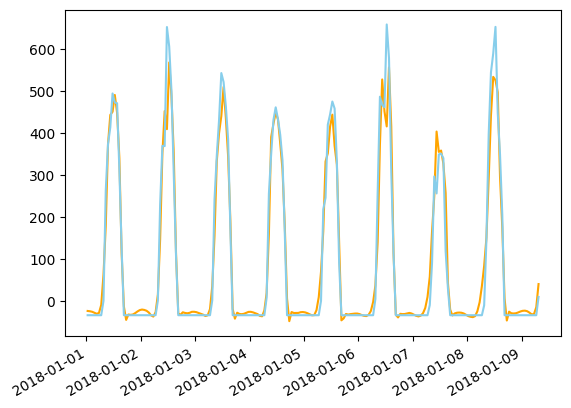

In [ ]:
res, error = plot_predictions1(model1, X_train1, y_train1, time_train)
res
error

83/83 [==============================] - 1s 10ms/step


0.04615445212209525

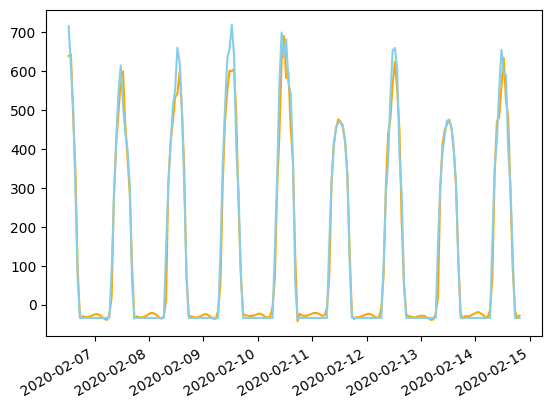

In [ ]:
res, error = plot_predictions1(model1, X_val1, y_val1, time_val)
error

165/165 [==============================] - 2s 11ms/step


0.0335660745166985

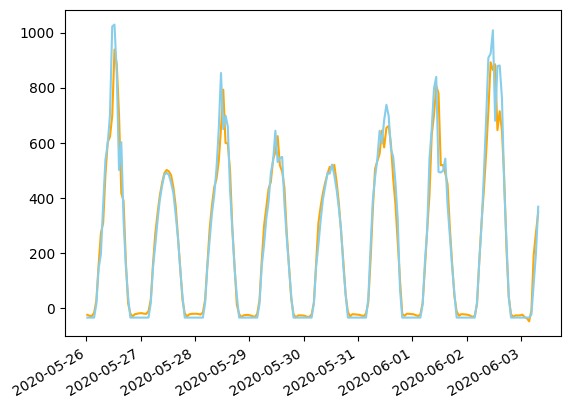

In [ ]:
res, error = plot_predictions1(model1, X_test1, y_test1, time_test)
res
error